# Financial Time Series

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set_style('darkgrid')
mpl.rcParams['font.family'] = 'monospace'

## Financial Data

### Data Import

In [12]:
!head source/tr_eikon_eod_data_rounded.csv

Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
2010-01-01,,,,,,,,,1.43,1096.35,,
2010-01-04,30.57,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.44,1120.0,47.71,109.8
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.7
2010-01-06,30.14,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.44,1138.5,49.34,111.51
2010-01-07,30.08,30.45,20.6,130.0,177.67,114.19,1141.69,19.06,1.43,1131.9,49.1,110.82
2010-01-08,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.1,49.84,111.37
2010-01-11,30.02,30.27,20.95,130.31,171.56,114.73,1146.98,17.55,1.45,1152.6,50.17,112.85
2010-01-12,29.67,30.07,20.61,127.35,167.82,113.66,1136.22,18.25,1.45,1127.3,48.35,110.49
2010-01-13,30.09,30.35,20.96,129.11,169.07,114.62,1145.68,17.85,1.45,1138.4,48.86,111.54


In [13]:
data = pd.read_csv('source/tr_eikon_eod_data_rounded.csv',  
                   index_col=0, 
                   parse_dates=True)  

In [14]:
data.head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82


In [15]:
data.tail()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.16,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.17,1252.25,22.31,118.65


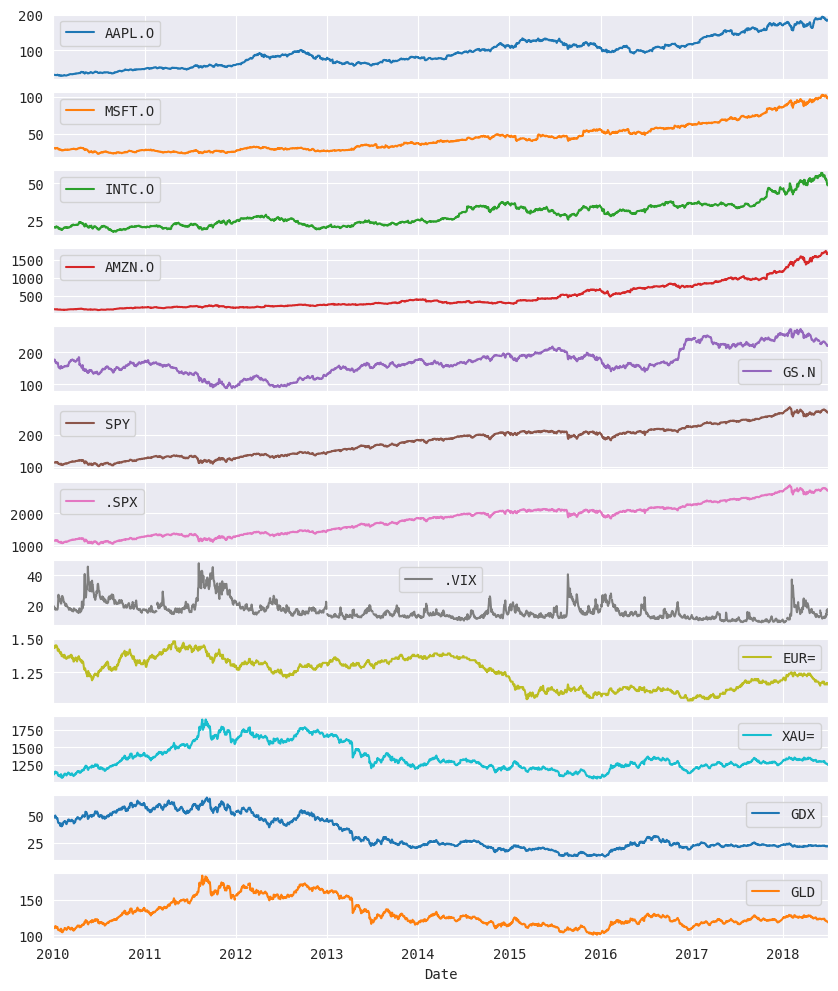

In [16]:
data.plot(figsize=(10, 12), subplots=True);  

In [17]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [18]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


### Summary Statistics

In [20]:
data.describe().round(2)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.30,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.56,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [21]:
data.mean()  

AAPL.O      93.456076
MSFT.O      44.561155
INTC.O      29.364210
AMZN.O     480.461258
GS.N       170.216221
SPY        180.323045
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248696
XAU=      1349.014129
GDX         33.566515
GLD        130.086595
dtype: float64

In [23]:
data.aggregate(['min',  
                'mean',  
                'std',  
                'median',  
                'max']  
).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.56,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


## Differences

In [24]:
data.diff().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,23.65,NaN,NaN
2010-01-05,0.06,0.01,-0.01,0.79,3.06,0.30,3.53,-0.69,0.00,-1.35,0.46,-0.10
2010-01-06,-0.49,-0.19,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.00,19.85,1.17,1.81
2010-01-07,-0.06,-0.32,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.01,-6.60,-0.24,-0.69


In [25]:
data.diff().mean()  

AAPL.O    0.064745
MSFT.O    0.031252
INTC.O    0.013552
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072101
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000117
XAU=      0.041887
GDX      -0.015070
GLD      -0.003455
dtype: float64

## Percent Changes

In [29]:
data.pct_change(fill_method=None).round(3).head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,0.000,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.000,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


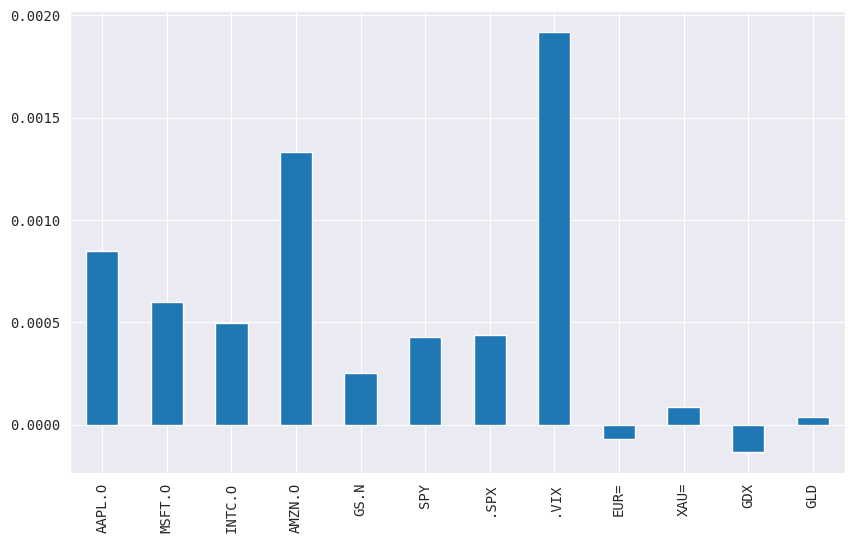

In [31]:
data.pct_change(fill_method=None).mean().plot(kind='bar', figsize=(10, 6));  

## Log Returns

In [32]:
rets = np.log(data / data.shift(1))  

In [33]:
rets.head().round(3)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,0.000,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.000,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


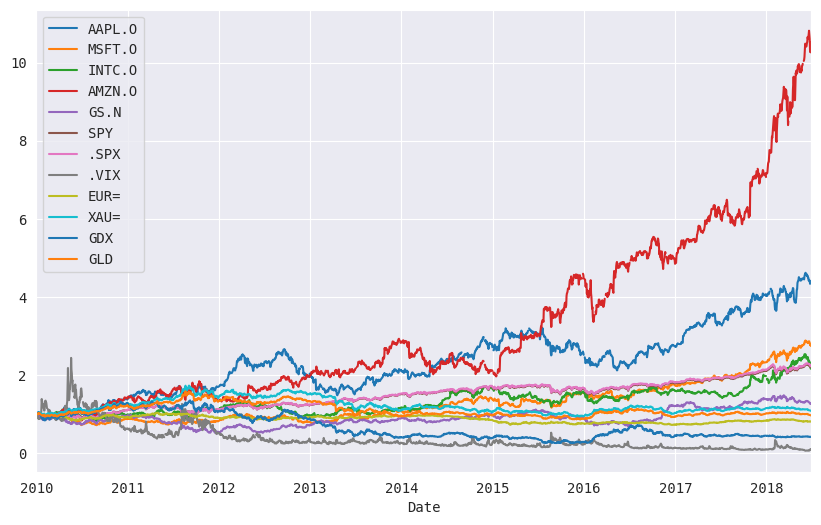

In [34]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_03.png');

## Resampling

In [36]:
data.resample('1W', label='right').last().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-10,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
2010-01-17,29.42,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.44,1129.90,47.42,110.86
2010-01-24,28.25,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.41,1092.60,43.79,107.17
2010-01-31,27.44,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.39,1081.05,40.72,105.96


In [38]:
data.resample('1M', label='right').last().head()  

/var/folders/ty/9l4rdqp56_d_fhqbnz545kx40000gn/T/ipykernel_23079/1673378425.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.resample('1M', label='right').last().head()


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.44,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.39,1081.05,40.72,105.96
2010-02-28,29.23,28.67,20.53,118.40,156.35,110.74,1104.49,19.50,1.36,1116.10,43.89,109.43
2010-03-31,33.57,29.29,22.29,135.77,170.63,117.00,1169.43,17.59,1.35,1112.80,44.41,108.95
2010-04-30,37.30,30.54,22.84,137.10,145.20,118.81,1186.69,22.05,1.33,1178.25,50.51,115.36
2010-05-31,36.70,25.80,21.42,125.46,144.26,109.37,1089.41,32.07,1.23,1215.71,49.86,118.88


/var/folders/ty/9l4rdqp56_d_fhqbnz545kx40000gn/T/ipykernel_23079/812027762.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rets.cumsum().apply(np.exp).resample('1M', label='right').last().plot(figsize=(10, 6));


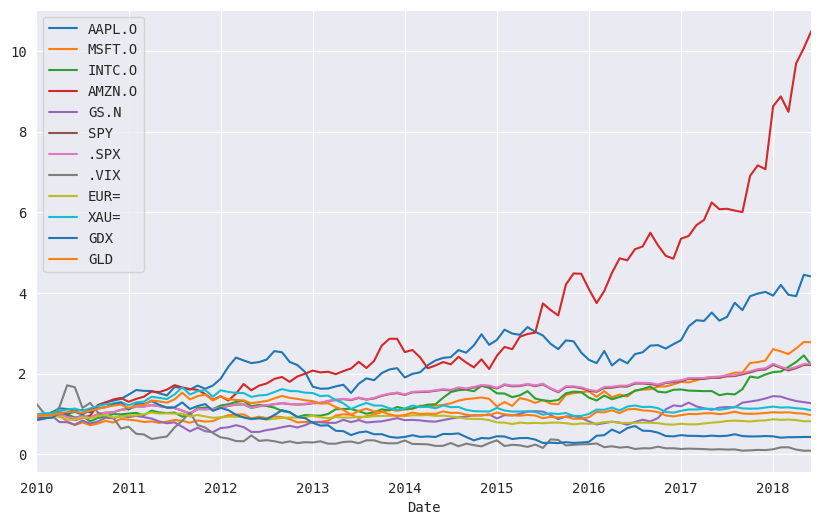

In [40]:
rets.cumsum().apply(np.exp).resample('1M', label='right').last().plot(figsize=(10, 6));  

## Rolling Statistics

In [41]:
sym = 'AAPL.O'

In [42]:
data = pd.DataFrame(data[sym]).dropna()

In [43]:
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


### An Overview

In [44]:
window = 20  

In [45]:
data['min'] = data[sym].rolling(window=window).min()  

In [46]:
data['mean'] = data[sym].rolling(window=window).mean()  

In [47]:
data['std'] = data[sym].rolling(window=window).std()  

In [48]:
data['median'] = data[sym].rolling(window=window).median()  

In [49]:
data['max'] = data[sym].rolling(window=window).max()  

In [50]:
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  

In [51]:
data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.82,27.44,29.5810,0.933313,29.820,30.72,27.807013
2010-02-02,27.98,27.44,29.4515,0.967908,29.710,30.72,27.936753
2010-02-03,28.46,27.44,29.3430,0.950314,29.685,30.72,28.329188
2010-02-04,27.44,27.44,29.2080,1.020333,29.545,30.72,27.662297
2010-02-05,27.92,27.44,29.1000,1.037350,29.420,30.72,27.855574


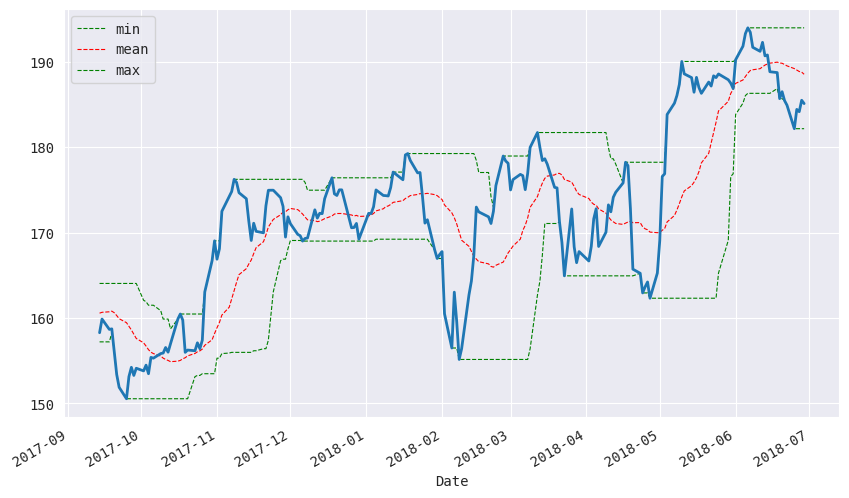

In [52]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);  

### A Technical Analysis Example

In [53]:
data['SMA1'] = data[sym].rolling(window=42).mean()  

In [54]:
data['SMA2'] = data[sym].rolling(window=252).mean()  

In [55]:
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


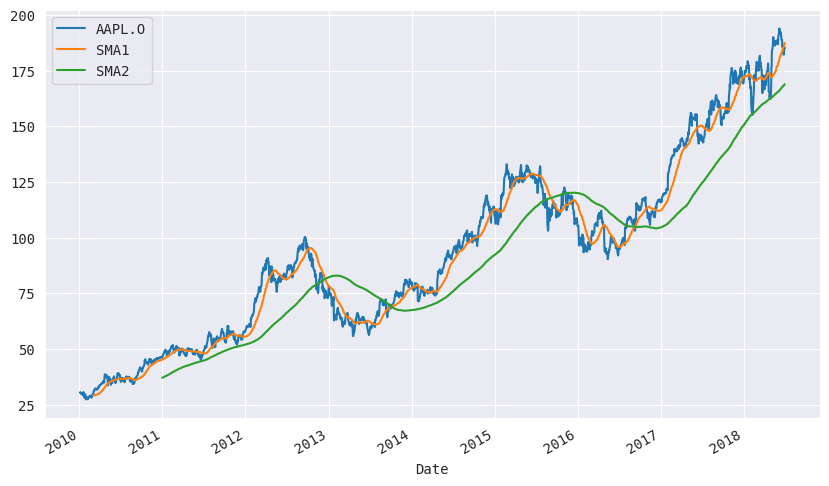

In [56]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6));  

In [57]:
data.dropna(inplace=True)  

In [58]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],  1,  -1)  

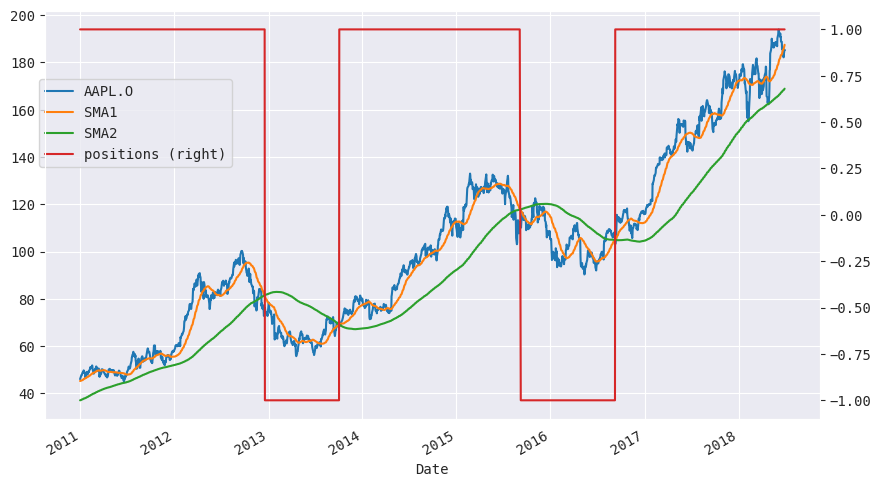

In [59]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
                                              secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

## Regression Analysis

### The Data

In [60]:
# EOD data from Thomson Reuters Eikon Data API
raw = pd.read_csv('./source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [61]:
data = raw[['.SPX', '.VIX']].dropna()

In [62]:
data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


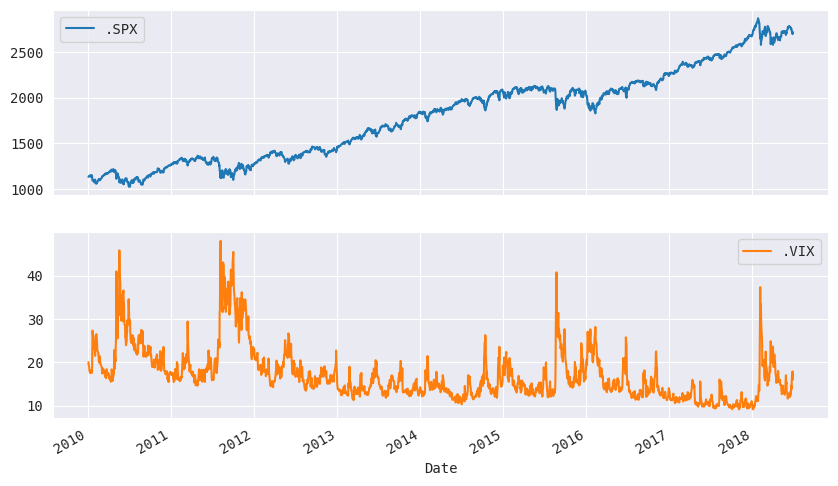

In [63]:
data.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_08.png');

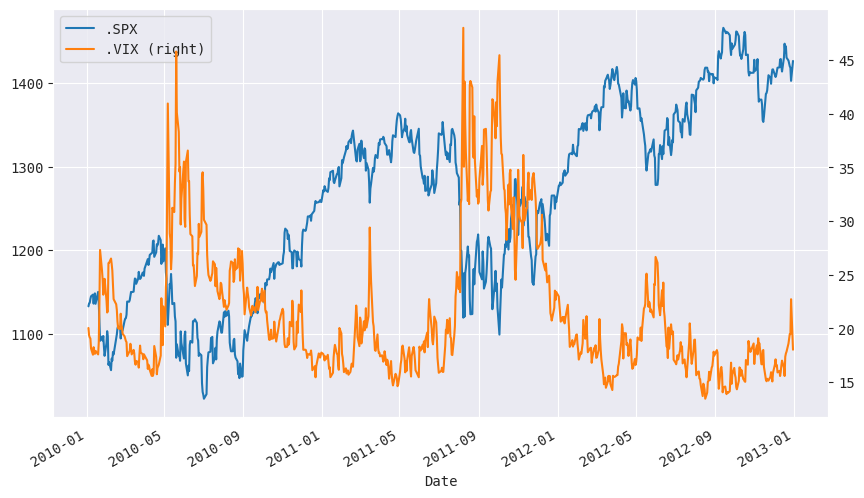

In [64]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_09.png');

### Log Returns

In [65]:
rets = np.log(data / data.shift(1)) 

In [66]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [67]:
rets.dropna(inplace=True)

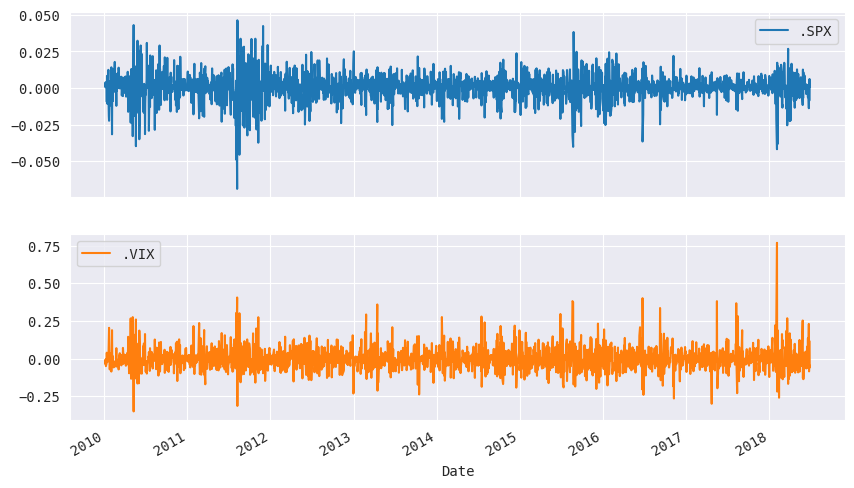

In [68]:
rets.plot(subplots=True, figsize=(10, 6));

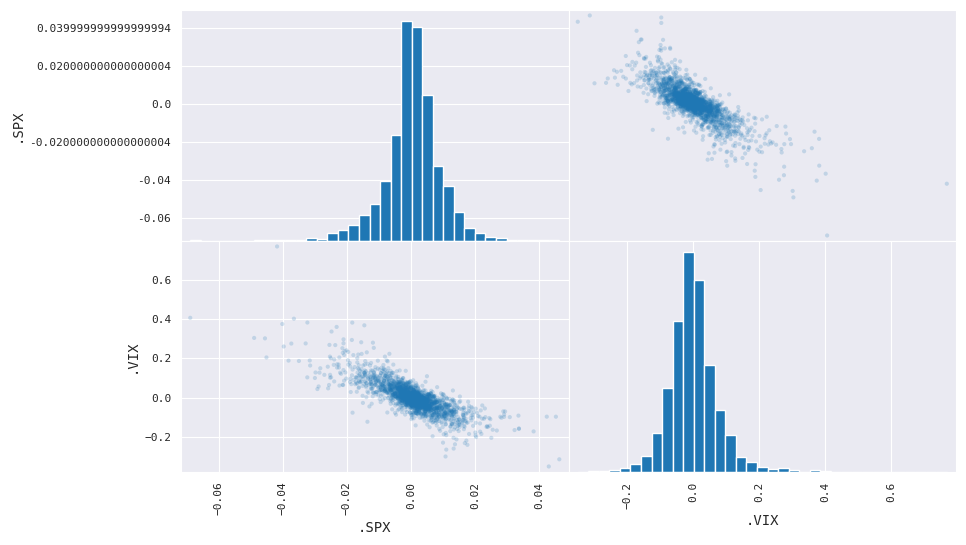

In [69]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));

### OLS Regression

In [70]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)  

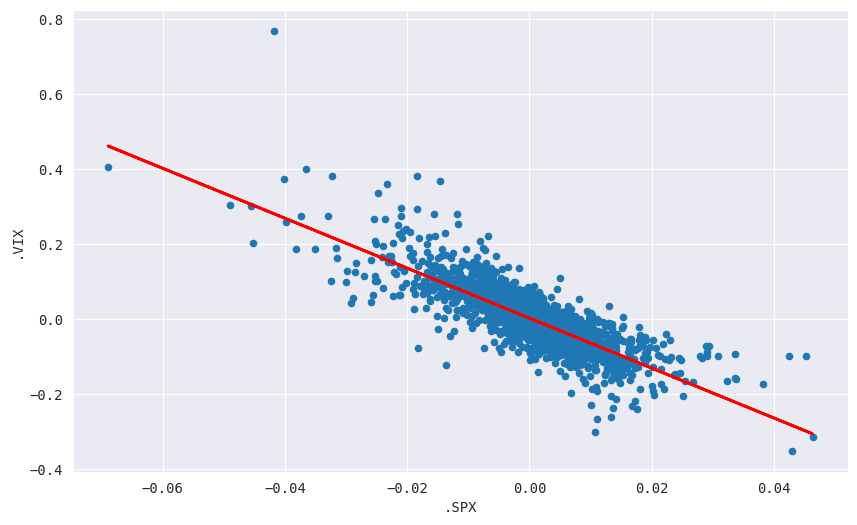

In [71]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))  
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);  

### Correlation

In [72]:
rets.corr()  

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


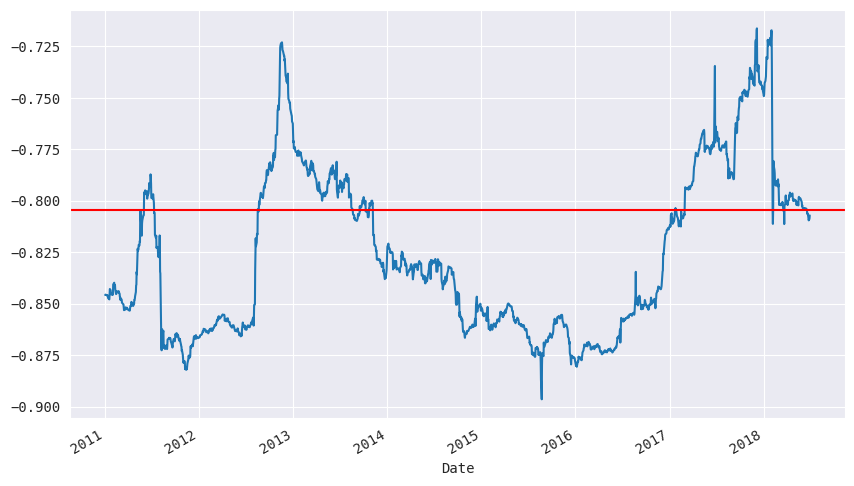

In [73]:
ax = rets['.SPX'].rolling(window=252).corr(
                  rets['.VIX']).plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='r');  